In [8]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt

In [21]:
# Especifica la ruta completa del archivo CSV
ruta_csv = r"df_hechos_victimas.csv" 

# Carga el archivo CSV en un DataFrame
df_hechos_victimas= pd.read_csv(ruta_csv)

In [32]:
df_hechos_victimas.sample(10)

,id,n_victimas,lugar_del_hecho,comuna,altura,participantes,calle,acusado,tipo_de_calle,hora,id_hecho,fecha,aaaa,mm,dd,rol,victima,sexo,edad,fecha_fallecimiento
82,2021-0002,1,"castro, emilio av. y murguiondo",9,sin dato,moto-cargas,"castro, emilio av.",cargas,avenida,10:20:00,2021-0002,2021-01-07,2021,1,7,conductor,moto,femenino,47,2021-01-07
67,2020-0067,1,saenz av. y beazley,4,sin dato,peaton-pasajeros,saenz av.,pasajeros,avenida,22:00:00,2020-0067,2020-12-11,2020,12,11,peaton,peaton,masculino,51,2020-12-11
92,2021-0012,1,au dellepiane y guamini,8,sin dato,peaton-auto,"dellepiane, luis, tte. gral.",auto,autopista,20:07:22,2021-0012,2021-01-29,2021,1,29,peaton,peaton,masculino,0,2021-01-29
106,2021-0026,1,"au frondizi altura quinquela martin, benito",4,sin dato,moto-objeto fijo,autopista 1 sur presidente arturo frondizi,objeto fijo,autopista,02:35:00,2021-0026,2021-03-15,2021,3,15,conductor,moto,masculino,36,2021-03-15
24,2020-0025,1,rivadavia av. 2551,3,2551.0,peaton-auto,rivadavia av.,auto,avenida,05:35:00,2020-0025,2020-05-12,2020,5,12,peaton,peaton,masculino,0,2020-05-12
1,2020-0002,1,saraza y varela av.,7,sin dato,moto-objeto fijo,saraza,objeto fijo,avenida,20:00:00,2020-0002,2020-01-05,2020,1,5,conductor,moto,masculino,36,2020-01-07
90,2021-0010,1,"paz, gral. av. y balbin, ricardo, dr. av.",12,sin dato,moto-auto,"paz, gral. av.",auto,gral paz,08:00:00,2021-0010,2021-01-23,2021,1,23,conductor,moto,masculino,28,2021-01-23
8,2020-0009,1,"peron, juan domingo, tte. general y salguero, ...",5,sin dato,peaton-auto,"peron, juan domingo, tte. general",auto,calle,14:50:00,2020-0009,2020-02-04,2020,2,4,peaton,peaton,masculino,48,2020-02-05
89,2021-0009,1,paysandu y gaona,6,sin dato,moto-objeto fijo,paysandu,objeto fijo,avenida,05:30:00,2021-0009,2021-01-23,2021,1,23,conductor,moto,masculino,31,2021-01-23
108,2021-0028,1,"corea av. y torres y tenorio, pres",7,sin dato,peaton-pasajeros,corea av.,pasajeros,avenida,17:20:00,2021-0028,2021-03-29,2021,3,29,peaton,peaton,masculino,0,2021-03-29


In [11]:
df_hechos_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   178 non-null    object
 1   n_victimas           178 non-null    int64 
 2   lugar_del_hecho      178 non-null    object
 3   comuna               178 non-null    int64 
 4   altura               178 non-null    object
 5   participantes        178 non-null    object
 6   calle                178 non-null    object
 7   acusado              178 non-null    object
 8   tipo_de_calle        178 non-null    object
 9   hora                 178 non-null    object
 10  id_hecho             178 non-null    object
 11  fecha                178 non-null    object
 12  aaaa                 178 non-null    int64 
 13  mm                   178 non-null    int64 
 14  dd                   178 non-null    int64 
 15  rol                  178 non-null    object
 16  victima 

KPIS Nro. 1

Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior
- Dato: censo 2022. Población total CABA: 3.120.612 -
Fuente: https://censo.gob.ar/index.php/datos_provisionales/

In [12]:
# Filtrar los datos para el último semestre (julio - diciembre de 2021)
filtro_ultimo_semestre = (df_hechos_victimas['fecha_fallecimiento'] >= '2021-07-01') & (df_hechos_victimas['fecha_fallecimiento'] <= '2021-12-31')
df_ultimo_semestre = df_hechos_victimas[filtro_ultimo_semestre]

# Filtrar los datos para el semestre anterior (enero - junio de 2021)
filtro_semestre_anterior = (df_hechos_victimas['fecha_fallecimiento'] >= '2021-01-01') & (df_hechos_victimas['fecha_fallecimiento'] <= '2021-06-30')
df_semestre_anterior = df_hechos_victimas[filtro_semestre_anterior]

# Calcular el número de víctimas fatales en cada semestre
num_victimas_ultimo_semestre = df_ultimo_semestre['n_victimas'].sum()
num_victimas_semestre_anterior = df_semestre_anterior['n_victimas'].sum()

print("julio-diciembre 2021 :", num_victimas_ultimo_semestre, ("victimas"))
print("enero-junio 2021 :", num_victimas_semestre_anterior, ("victimas") )

julio-diciembre 2021 : 40 victimas
enero-junio 2021 : 56 victimas


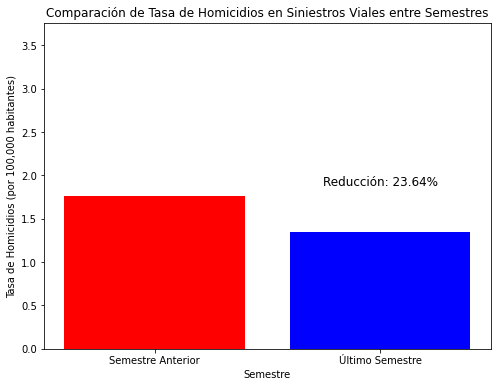

Se ha cumplido el objetivo de reducción del 10%.


In [13]:
# Datos
poblacion_total = 3120612
homicidios_ultimo_semestre = 42
homicidios_semestre_anterior = 55

# Calcular la tasa de homicidios en siniestros viales del último semestre
tasa_homicidios_ultimo_semestre = (homicidios_ultimo_semestre / poblacion_total) * 100000

# Calcular la tasa de homicidios en siniestros viales del semestre anterior
tasa_homicidios_semestre_anterior = (homicidios_semestre_anterior / poblacion_total) * 100000

# Calcular la diferencia porcentual
diferencia_porcentual = ((tasa_homicidios_semestre_anterior - tasa_homicidios_ultimo_semestre) / tasa_homicidios_semestre_anterior) * 100

# Graficar la diferencia porcentual
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(['Semestre Anterior', 'Último Semestre'], [tasa_homicidios_semestre_anterior, tasa_homicidios_ultimo_semestre], color=['red', 'blue'])
plt.title('Comparación de Tasa de Homicidios en Siniestros Viales entre Semestres')
plt.xlabel('Semestre')
plt.ylabel('Tasa de Homicidios (por 100,000 habitantes)')
plt.text(1, tasa_homicidios_ultimo_semestre + 0.5, f'Reducción: {diferencia_porcentual:.2f}%', ha='center', va='bottom', fontsize=12, color='black')
plt.ylim(0, max(tasa_homicidios_ultimo_semestre, tasa_homicidios_semestre_anterior) + 2)
plt.show()

# Verificar si se cumplió la reducción del 10%
if diferencia_porcentual >= 10:
    print('Se ha cumplido el objetivo de reducción del 10%.')
else:
    print('No se ha cumplido el objetivo de reducción del 10%.')


Se crea un CSV con las variables, para trabajarlo en Power Bi

In [14]:
KPIs1 = {
    'Semestre': ['julio-diciembre 2021', 'enero-junio 2021'],
    'Número de Víctimas': [num_victimas_ultimo_semestre, num_victimas_semestre_anterior],
    'Tasa de Homicidios (por 100,000 habitantes)': [tasa_homicidios_ultimo_semestre, tasa_homicidios_semestre_anterior],
    'Diferencia Porcentual (%)': [diferencia_porcentual, None] 
}

KPIs1_df = pd.DataFrame(KPIs1)
KPIs1_df


,Semestre,Número de Víctimas,"Tasa de Homicidios (por 100,000 habitantes)",Diferencia Porcentual (%)
0,julio-diciembre 2021,40,1.345890,23.636364
1,enero-junio 2021,56,1.762475,NaN


In [20]:
ruta_csv = r"C:\Users\rossa\Desktop\HENRY\PROYECTO INDIVIDUAL PB\KPIs1_df.csv"

KPIs1_df.to_csv(ruta_csv, index=False)

print("DataFrame guardado como archivo CSV en:", ruta_csv)

DataFrame guardado como archivo CSV en: C:\Users\rossa\Desktop\HENRY\PROYECTO INDIVIDUAL PB\KPIs1_df.csv


kPIs 2

Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior

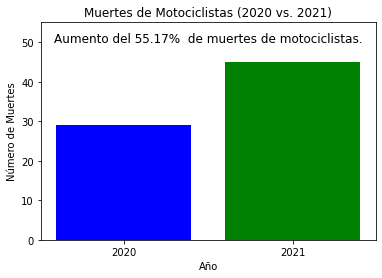

No se ha cumplido el objetivo de reducción del 7%.


In [37]:
# Filtrar los datos para el año anterior.
filtro_anterior = (df_hechos_victimas['fecha_fallecimiento'].dt.year == (2021 - 1))
df_anterior = df_hechos_victimas[filtro_anterior]

# Filtrar los datos para el año actual.
filtro_actual = (df_hechos_victimas['fecha_fallecimiento'].dt.year == 2021)
df_actual = df_hechos_victimas[filtro_actual]

# Contar el número de muertes de motociclistas para el año anterior y actual.
muertes_anterior = df_anterior[df_anterior['victima'] == 'moto'].shape[0]
muertes_actual = df_actual[df_actual['victima'] == 'moto'].shape[0]

# Calcular el porcentaje de cambio.
porcentaje_cambio = ((muertes_actual - muertes_anterior) / muertes_anterior) * 100

# Graficar los resultados.
plt.figure(figsize=(6, 4))
plt.bar(['2020', '2021'], [muertes_anterior, muertes_actual], color=['blue', 'green'])
plt.title('Muertes de Motociclistas (2020 vs. 2021)')
plt.xlabel('Año')
plt.ylabel('Número de Muertes')
plt.ylim(0, max(muertes_anterior, muertes_actual) + 10)

# Mostrar el resultado de forma genérica
if porcentaje_cambio <= -7:
    mensaje = f'Reducción del {abs(porcentaje_cambio):.2f}%  de muertes de motociclistas.'
else:
    mensaje = f'Aumento del {abs(porcentaje_cambio):.2f}%  de muertes de motociclistas.'

plt.annotate(mensaje, (0.5, max(muertes_anterior, muertes_actual) + 5), ha='center', fontsize=12)
plt.show()

# Verificar si se cumplió la reducción del 7%
if porcentaje_cambio <= -7:
    print('Se ha cumplido el objetivo de reducción del 7%.')
else:
    print('No se ha cumplido el objetivo de reducción del 7%.')


In [64]:
# Filtrar los datos para el año 2020.
filtro_2020 = (df_hechos_victimas['fecha_fallecimiento'].dt.year == 2020)
df_2020 = df_hechos_victimas[filtro_2020]

# Filtrar los datos para el año 2021.
filtro_2021 = (df_hechos_victimas['fecha_fallecimiento'].dt.year == 2021)
df_2021 = df_hechos_victimas[filtro_2021]

# Contar el número total de muertes en 2020 y 2021.
total_muertes_2020 = df_2020.shape[0]
total_muertes_2021 = df_2021.shape[0]

# Calcular el porcentaje de cambio.
porcentaje_cambio = ((total_muertes_2021 - total_muertes_2020) / total_muertes_2020) * 100

# Imprimir el porcentaje de muertes en 2020 y 2021, así como la diferencia.
print(f'Porcentaje de muertes en 2020: {total_muertes_2020 / (total_muertes_2020 + total_muertes_2021) * 100:.2f}%')
print(f'Porcentaje de muertes en 2021: {total_muertes_2021 / (total_muertes_2020 + total_muertes_2021) * 100:.2f}%')
print(f'Diferencia en porcentaje entre 2020 y 2021: {porcentaje_cambio:.2f}%')


Porcentaje de muertes en 2020: 45.45%
Porcentaje de muertes en 2021: 54.55%
Diferencia en porcentaje entre 2020 y 2021: 20.00%


Creación de un DF para transformarlo en un csv con las variables calculadas para graficar en Power BI. 

In [46]:
# Filtrar los datos para el año anterior.
filtro_anterior = (df_hechos_victimas['fecha_fallecimiento'].dt.year == (2021 - 1))
df_anterior = df_hechos_victimas[filtro_anterior]

# Filtrar los datos para el año actual.
filtro_actual = (df_hechos_victimas['fecha_fallecimiento'].dt.year == 2021)
df_actual = df_hechos_victimas[filtro_actual]

# Contar el número de muertes de motociclistas para el año anterior y actual.
muertes_anterior = df_anterior[df_anterior['victima'] == 'moto'].shape[0]
muertes_actual = df_actual[df_actual['victima'] == 'moto'].shape[0]

# Calcular el porcentaje de cambio.
porcentaje_cambio = ((muertes_actual - muertes_anterior) / muertes_anterior) * 100

# DataFrame reducido con las variables necesarias
data = {
    'ano': ['2020', '2021'],
    'muertes_motociclistas ': [muertes_anterior, muertes_actual],
    'porcentaje_cambio': [porcentaje_cambio, porcentaje_cambio],  # se agrega el mismo valor para ambos años
}

df_kPI2 = pd.DataFrame(data)


df_kPI2


,ano,muertes_motociclistas,porcentaje_cambio
0,2020,29,55.172414
1,2021,45,55.172414


In [75]:
ruta_csv = r"C:\Users\rossa\Desktop\HENRY\PROYECTO INDIVIDUAL PB\Proyecto_siniestros_viales\df_kPI2.csv"

df_kPI2.to_csv(ruta_csv, index=False)

print("DataFrame guardado como archivo CSV en:", ruta_csv)

DataFrame guardado como archivo CSV en: C:\Users\rossa\Desktop\HENRY\PROYECTO INDIVIDUAL PB\Proyecto_siniestros_viales\df_kPI2.csv


KPIs 3 (propuesta)

Reducir en un 5% la cantidad de accidentes mortales de autos en el último añsemestre del año 2021,  respecto al semestre anterior

C:\Users\rossa\AppData\Local\Temp\ipykernel_108424\2468855286.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021_autos['semestre'] = df_2021_autos['fecha_fallecimiento'].apply(lambda x: '1er Semestre' if x.month <= 6 else '2do Semestre')


No se ha cumplido el objetivo de reducción del 5%.


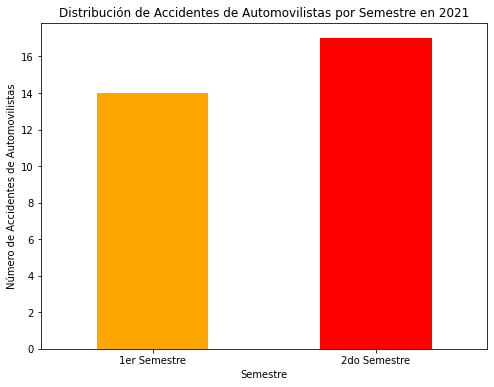

In [33]:

df_hechos_victimas['fecha_fallecimiento'] = pd.to_datetime(df_hechos_victimas['fecha_fallecimiento'])

# Filtrar los datos para incluir solo registros del año 2021 y víctimas que sean automovilistas
df_2021_autos = df_hechos_victimas[(df_hechos_victimas['fecha_fallecimiento'].dt.year == 2021) & (df_hechos_victimas['acusado'] == 'auto')]

# Crear una nueva columna "semestre" basada en la fecha
df_2021_autos['semestre'] = df_2021_autos['fecha_fallecimiento'].apply(lambda x: '1er Semestre' if x.month <= 6 else '2do Semestre')

# Calcular la distribución de accidentes por semestre
distribucion_semestre = df_2021_autos['semestre'].value_counts().sort_index()

# Definir colores para cada semestre
colores = ['orange', 'red']

# Graficar la distribución por semestre
plt.figure(figsize=(8, 6))
distribucion_semestre.plot(kind='bar', color=colores)
plt.xlabel('Semestre')
plt.ylabel('Número de Accidentes de Automovilistas')
plt.title('Distribución de Accidentes de Automovilistas por Semestre en 2021')
plt.xticks(rotation=0)

# Calcular el objetivo (reducción del 5%)
objetivo = distribucion_semestre['1er Semestre'] * 0.95  # Reducción del 5%

# Verificar si se cumple el objetivo
if distribucion_semestre['2do Semestre'] <= objetivo:
    print('Se ha cumplido el objetivo de reducción del 5%.')
else:
    print('No se ha cumplido el objetivo de reducción del 5%.')
    
plt.show()




In [71]:
diferencia_porcentaje = ((distribucion_semestre['2do Semestre'] - distribucion_semestre['1er Semestre']) / distribucion_semestre['1er Semestre']) * 100

# Mostrar la diferencia en porcentaje 
print(f'Diferencia en porcentaje entre el 1er y 2do semestre: {diferencia_porcentaje:.2f}%')

# Verificar si se cumple el objetivo (reducción del 5%)
if diferencia_porcentaje <= -5.0:
    print('Se ha cumplido el objetivo de reducción del 5%.')
else:
    print('No se ha cumplido el objetivo de reducción del 5%.')

Diferencia en porcentaje entre el 1er y 2do semestre: 21.43%
No se ha cumplido el objetivo de reducción del 5%.


Creación de un DF para transformarlo en un csv con las variables calculadas para graficar en Power BI. 

In [74]:
data = {
    'Semestre': distribucion_semestre.index,
    'Numero_Accidentes': distribucion_semestre.values,
}
df_KPI_3 = pd.DataFrame(data)
df_KPI_3

,Semestre,Numero_Accidentes
0,1er Semestre,14
1,2do Semestre,17


In [61]:
ruta_csv = r"C:\Users\rossa\Desktop\HENRY\PROYECTO INDIVIDUAL PB\Proyecto_siniestros_viales\KPI_3.csv"

df_KPI_3.to_csv(ruta_csv, index=False)

print("DataFrame guardado como archivo CSV en:", ruta_csv)

DataFrame guardado como archivo CSV en: C:\Users\rossa\Desktop\HENRY\PROYECTO INDIVIDUAL PB\Proyecto_siniestros_viales\KPI_3.csv
